In [1]:
import pandas as pd
import sklearn as sk
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
import networkx as nx
from scipy.linalg import norm
from scipy import sum, average
import cv2

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

import png



Using TensorFlow backend.


In [2]:
#importing all data
path = "/Users/AndrewO/Documents/HeriotWatt/PycharmProjects/dataminingcw1"
col_name = ['class']

features = pd.read_csv(
    filepath_or_buffer='{path}/x_train_gr_smpl.csv'.format(path=path),
    sep=',', na_values='None', decimal='.')

classes = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl.csv'.format(path=path),
    sep=',', na_values='None', decimal='.')

y_0 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_0.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_1 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_1.csv'.format(path=path),
    sep=',', na_values='None', decimal='.', names = col_name)

y_2 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_2.csv'.format(path=path),
    sep=',', na_values='None', decimal='.', names = col_name)

y_3 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_3.csv'.format(path=path),
    sep=',', na_values='None', decimal='.', names = col_name)

y_4 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_4.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_5 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_5.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_6 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_6.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_7 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_7.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_8 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_8.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_9 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_9.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

classes = classes.rename({'0': 'class'}, axis='columns')
roadsigns = pd.concat([features, classes], axis = 1)

classes_train = []
classes_train.append(pd.concat([features, y_0], axis = 1))
classes_train.append(pd.concat([features, y_1], axis = 1))
classes_train.append(pd.concat([features, y_2], axis = 1))
classes_train.append(pd.concat([features, y_3], axis = 1))
classes_train.append(pd.concat([features, y_4], axis = 1))
classes_train.append(pd.concat([features, y_5], axis = 1))
classes_train.append(pd.concat([features, y_6], axis = 1))
classes_train.append(pd.concat([features, y_7], axis = 1))
classes_train.append(pd.concat([features, y_8], axis = 1))
classes_train.append(pd.concat([features, y_9], axis = 1))

In [98]:
def getInstancesFromClass(classAttribute, dataframe):
    a = dataframe.loc[dataframe['class'] == classAttribute]
    return a.drop(['class'], axis = 1)

def getLabelsFromClass(classAttribute, dataframe):
    a = dataframe.loc[dataframe['class'] == classAttribute]
    return a.loc[:, 'class']

def allInstancesToMatrix(instances):
    matrices = []
    if len(instances) == 1:
        matrices = (instances.iloc[[0]]).values.reshape(48,48)
    else:
        for i in range(len(instances)):
            matrices.append((instances.iloc[[i]]).values.reshape(48,48))
    return matrices

def createBins(nbBins):
    bins = []
    for i in range(nbBins - 1):
        bins.append(255 / nbBins * (nbBins - i - 1))
    return bins

def putValuesInBins(bins, x):
    for i in bins:
        if x >= i:
            return 255 / (bins.index(i) + 1)
    return 0

def naive_bayes(x, train_x, train_y, test_x, test_y):
    # uses Gaussian naive bayes on the whole data
    model = GaussianNB()
    
    # if function is called with parameter x - 
    # then pixel intensity values are split into x number of bins
    if x is not None:
        bins = createBins(x)
        train_x = train_x.applymap(lambda x : putValuesInBins(bins, x))
        test_x = test_x.applymap(lambda x : putValuesInBins(bins, x))

    # Train the model 
    model.fit(train_x, train_y)

    # Predict Output 
    pred = model.predict(test_x)

    # Plot Confusion Matrix
    mat = confusion_matrix(test_y, pred)
    # Normalising the matrix 
    cm = mat/ mat.sum(axis=1)[:, np.newaxis]
    names = np.unique(pred)
    ax = sns.heatmap(mat, square=True, annot=True, cbar=False,
                xticklabels=names, yticklabels=names, fmt="d" )
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show(block=True)
    print(accuracy_score(test_y,pred))  
    return mat
    
def normalize(arr):
    rng = arr.max()-arr.min()
    amin = arr.min()
    return (arr-amin)*255/rng

def compare_images(img1, img2):
    img1 = normalize(img1)
    img2 = normalize(img2)
    # calculate the difference
    diff = img1 - img2
    norm = sum(abs(diff))
    return norm

def remove_bad_instances(class_attribute, max_score, dataframe):
    signs = getInstancesFromClass(class_attribute, dataframe)
    labels = getLabelsFromClass(class_attribute, dataframe)
    signs0 = np.array(allInstancesToMatrix(signs))
    a = signs0.mean(axis=0)
    #plt.imshow(a, cmap=cm.Greys)
    #plt.show(block=True)
    y = 0
    scores = []
    for i in signs0:
        scores.append(compare_images(a, i))
    new_scores = list(filter(lambda x : x < max_score, scores))
    indexes = []
    index = 0
    #print(len(scores))
    for score in scores:
        if score >= max_score:
            indexes.append(index)
        index += 1
    #print(len(new_scores))
    #print(len(indexes))
    dataframe_indexes = []
    for index in sorted(indexes):
        dataframe_indexes.append(signs.index[index])
    new_signs = signs.drop(dataframe_indexes)
    new_labels = labels.drop(dataframe_indexes)
    new_signs = pd.concat([new_signs, new_labels], axis = 1)
    return new_signs

def create_train_test_sets(df):
    # create matrix of same size than roadsigns with 80% of true and 20% of false
    msk = np.random.rand(len(df)) < 0.8

    # separate dataframe into a training and testing sets
    train_x = df[msk]
    test_x = df[~msk]

    # remove last columns for x sets and the rest for y sets
    train_y = train_x.loc[:, 'class']
    train_x = train_x.drop(['class'], axis=1)
    test_y = test_x.loc[:, 'class']
    test_x = test_x.drop(['class'], axis=1)
    
    train_test = {
        "train_x": train_x,
        "train_y": train_y,
        "test_x": test_x,
        "test_y": test_y
    }
    return train_test

def precision_recall(mat):
    f, (prec, rec) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

    precision = []
    for i in range(10):
        precision.append((mat[i,i])/ (sum(mat[:, i])))

    recall = []
    for i in range(10):
        recall.append((mat[i,i])/ (sum(mat[i, :])))

    x = np.array([0,1,2,3,4,5,6,7,8,9])

    precision  = np.array(precision)
    recall  = np.array(recall)

    sns.barplot(x = x, y = precision, palette="deep", ax=prec)
    prec.set_xlabel("Precision per class")

    sns.barplot(x = x, y = recall, palette="deep", ax=rec)
    rec.set_xlabel("Recall per class")

[0 1 2 3 4 5 6 7 8 9]


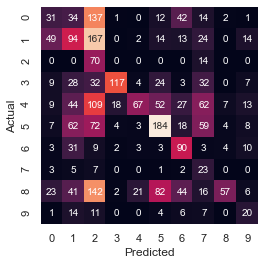

0.2992845786963434


In [67]:
#Naive Bayes on raw data
sets = create_train_test_sets(roadsigns)
mat = naive_bayes(None, sets["train_x"], sets["train_y"], sets["test_x"], sets["test_y"])


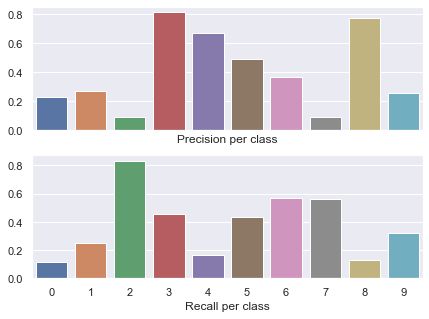

In [94]:
precision_recall(mat)

(7700, 2305)
[0 1 2 3 4 5 6 7 8 9]


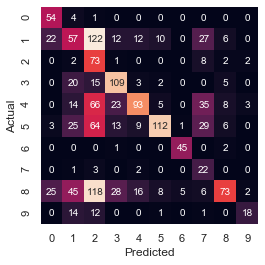

0.42988204456094364


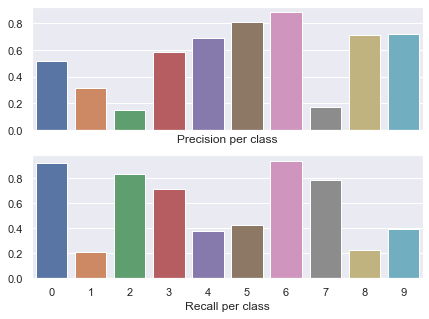

In [96]:
# Naive Bayes - some 'bad' training instances where removed
# Mean image for each class was computed (computed from the whole dataset)  
# images with Manhattan distance greater than a specified value are removed
# Increased accuracy because the test set consists of mostly "good" images

new_signs = []
for i in range(10):
    good_signs = remove_bad_instances(i, 150000, roadsigns)
    new_signs.append(good_signs)
good_train_set = pd.concat(new_signs, ignore_index=True)
good_train_set = sk.utils.shuffle(good_train_set)

# We can see from the shape that there are only 7700 instances left in the set
print(good_train_set.shape)

sets = create_train_test_sets(good_train_set)
mat = naive_bayes(None, sets["train_x"], sets["train_y"], sets["test_x"], sets["test_y"])
precision_recall(mat)

In [6]:
# In real case scenario test data is not available until testing
# To avoid "peeking" into test set and getting information that should not be available
# Mean is computed only from the training set

# create matrix of same size than roadsigns with 80% of true and 20% of false
msk = np.random.rand(len(roadsigns)) < 0.8

# separate dataframe into a training and testing sets
train_set = roadsigns[msk]
test_set = roadsigns[~msk]

new_signs = []
for i in range(10):
    good_signs = remove_bad_instances(i, 150000, train_set)
    new_signs.append(good_signs)
good_train_set = pd.concat(new_signs, ignore_index=True)
good_train_set = sk.utils.shuffle(good_train_set)

# remove last columns for x sets and the rest for y sets
train_y = good_train_set.loc[:, 'class']
train_x = good_train_set.drop(['class'], axis=1)
test_y = test_set.loc[:, 'class']
test_x = test_set.drop(['class'], axis=1)

# naive bayes on data preprocessed by removing images bad images (compared to the mean image)
naive_bayes(None, train_x, train_y, test_x, test_y)

0.300390625


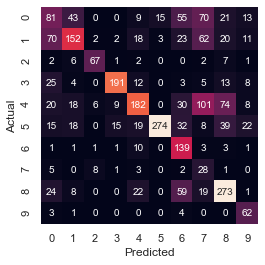

0.5588121866563825


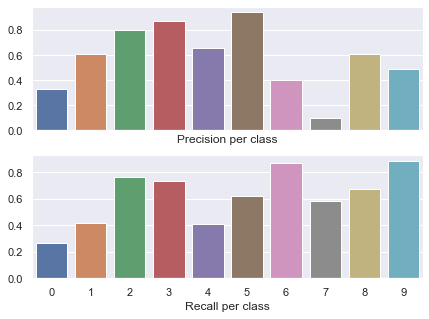

In [100]:
# Naive Bayes with L2 normalised data 

# Normalisation is done seperatly on the training and test set respectively 
# to avoid information information from the test set to spill into the training set
# This would surely increase the accuracy on that particular test set 
# but accuracy would not generalise to an unknow test set

sets = create_train_test_sets(roadsigns)

values = sets["train_x"].values
values_test = sets["test_x"].values

transformer = Normalizer().fit(values)
values_x = transformer.transform(values)
transformer = Normalizer().fit(values_test)
values_test_x = transformer.transform(values_test)

norm_test_x = pd.DataFrame(data=values_test_x)
norm_train_x = pd.DataFrame(data=values_x)
mat = naive_bayes(None, norm_train_x, sets["train_y"], norm_test_x, sets["test_y"])
precision_recall(mat)

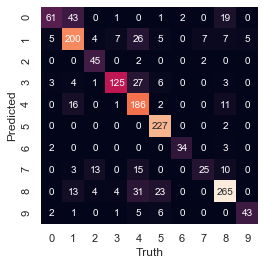

0.7767799871712636


In [8]:
# Naive Bayes with L2 normalised data only on 'good' instances

new_signs = []
for i in range(10):
    good_signs = remove_bad_instances(i, 150000, roadsigns)
    new_signs.append(good_signs)
good_train_set = pd.concat(new_signs, ignore_index=True)
good_train_set = sk.utils.shuffle(good_train_set)

sets = create_train_test_sets(good_train_set)

values = sets["train_x"].values
values_test = sets["test_x"].values

transformer = Normalizer().fit(values)
values_x = transformer.transform(values)
transformer = Normalizer().fit(values_test)
values_test_x = transformer.transform(values_test)

norm_test_x = pd.DataFrame(data=values_test_x)
norm_train_x = pd.DataFrame(data=values_x)
mat = naive_bayes(None, norm_train_x, sets["train_y"], norm_test_x, sets["test_y"])
precision_recall(mat)

In [9]:
# After instance filtering, some classes are more represented than others - eg. class 9
# We can also notice that some classes have lost many instances : e.g. class1

for i in range(10):
    print(good_train_set.loc[good_train_set['class'] == i].shape )    
print("------")    
for i in range(10):
    print(roadsigns.loc[roadsigns['class'] == i].shape)

(331, 2305)
(1289, 2305)
(398, 2305)
(728, 2305)
(1362, 2305)
(1347, 2305)
(258, 2305)
(184, 2305)
(1565, 2305)
(238, 2305)
------
(1410, 2305)
(1860, 2305)
(420, 2305)
(1320, 2305)
(2100, 2305)
(2160, 2305)
(780, 2305)
(240, 2305)
(2070, 2305)
(300, 2305)


[0 1 2 3 4 5 6 7 8 9]


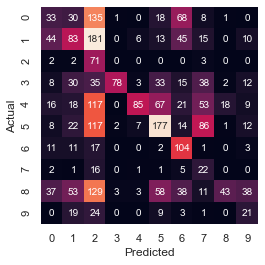

0.280078125
[0 1 2 3 4 5 6 7 8 9]


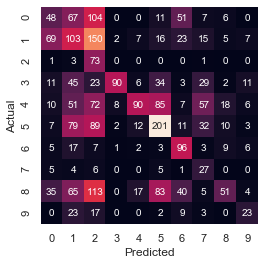

0.31328125
[0 1 2 3 4 5 6 7 8 9]


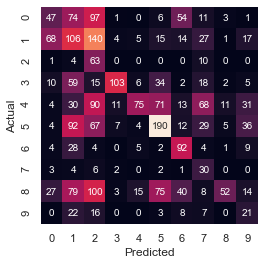

0.304296875
[0 1 2 3 4 5 6 7 8 9]


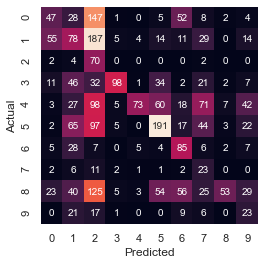

0.289453125
[0 1 2 3 4 5 6 7 8 9]


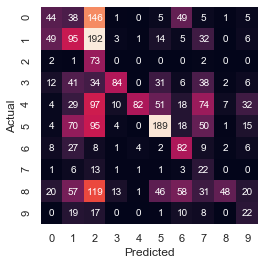

0.289453125
[0 1 2 3 4 5 6 7 8 9]


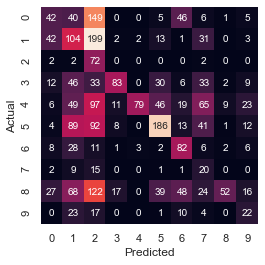

0.28984375
[0 1 2 3 4 5 6 7 8 9]


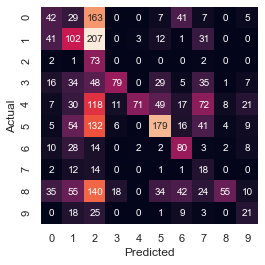

0.28125
[0 1 2 3 4 5 6 7 8 9]


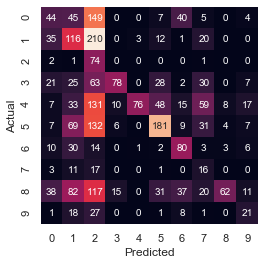

0.2921875


In [97]:
# basic naive bayes on data with bining according to pixel value
sets = create_train_test_sets(roadsigns)

for i in range(2, 10):
    naive_bayes(i, sets["train_x"], sets["train_y"], sets["test_x"], sets["test_y"])
    
    
# Binning does not improve accuracy

In [11]:
# Calculating correlation per class
top_attributes = []
for class_train in classes_train:
    top_attributes.append(class_train.corr())  

In [12]:
top2 = []
for a in top_attributes:
    x = a.abs().nlargest(3, 'class').index.values
    top2.append(np.delete(x, 0)) 
top2 = np.concatenate(top2, axis = 0)

top10 = []
for a in top_attributes:
    x = a.abs().nlargest(11, 'class').index.values
    top10.append(np.delete(x, 0)) 
top10 = np.concatenate(top10, axis = 0)

top50 = []
for a in top_attributes:
    x = a.abs().nlargest(51, 'class').index.values
    top50.append(np.delete(x, 0)) 
top50 = np.concatenate(top50, axis = 0)

In [13]:
all_top2 = pd.DataFrame() 
for i in range(10):
    a = roadsigns.loc[roadsigns['class'] == i]
    b = top2.tolist()
    data = a[b].values.tolist()
    all_top2 = all_top2.append(data, ignore_index = True)
    
all_top10 = pd.DataFrame() 
for i in range(10):
    a = roadsigns.loc[roadsigns['class'] == i]
    b = top10.tolist()
    data = a[b].values.tolist()
    all_top10 = all_top10.append(data, ignore_index = True)
    
all_top50 = pd.DataFrame() 
for i in range(10):
    a = roadsigns.loc[roadsigns['class'] == i]
    b = top50.tolist()
    data = a[b].values.tolist()
    all_top50 = all_top50.append(data, ignore_index = True)
    
all_top2['class'] = classes
all_top10['class'] = classes
all_top50['class'] = classes

all_top2 = sk.utils.shuffle(all_top2)
all_top10 = sk.utils.shuffle(all_top10)
all_top50 = sk.utils.shuffle(all_top50)

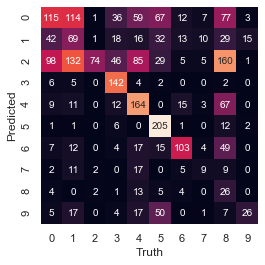

0.3748493370831659


In [14]:
sets = create_train_test_sets(all_top2)
mat = naive_bayes(None, sets["train_x"], sets["train_y"], sets["test_x"], sets["test_y"])
precision_recall(mat)

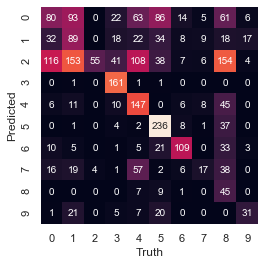

0.38204017329657347


In [15]:
sets = create_train_test_sets(all_top10)
mat = naive_bayes(None, sets["train_x"], sets["train_y"], sets["test_x"], sets["test_y"])
precision_recall(mat)

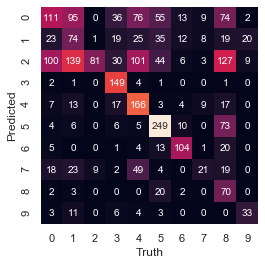

0.4158805031446541


In [16]:
sets = create_train_test_sets(all_top50)
mat = naive_bayes(None, sets["train_x"], sets["train_y"], sets["test_x"], sets["test_y"])
precision_recall(mat)

In [17]:
msk = np.random.rand(len(features)) < 0.8
x_train = features[msk].values
x_test = features[~msk].values

y_train = np.transpose(classes[msk].values)[0]
y_test = np.transpose(classes[~msk].values)[0]
    
x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255
    
x_train = x_train.reshape(-1, 48*48)
x_test = x_test.reshape(-1, 48*48)


In [18]:
np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48, 48)), (32, 32)) ,axis=1, arr=x_train
    ).reshape(-1, 32 * 32)
    
#x_train_sm, _, y_train_sm, _ = train_test_split(x_train, y_train, test_size=.9)

array([[0.12181373, 0.12696078, 0.12352941, ..., 0.14828431, 0.14901961,
        0.14534314],
       [0.11936275, 0.12083333, 0.11348039, ..., 0.1497549 , 0.15      ,
        0.15588235],
       [0.10196078, 0.09534314, 0.09509804, ..., 0.15661765, 0.14338235,
        0.14117647],
       ...,
       [0.03063725, 0.02916667, 0.03014706, ..., 0.03602941, 0.03995098,
        0.04215686],
       [0.03504902, 0.03504902, 0.03455882, ..., 0.03529412, 0.0379902 ,
        0.03431373],
       [0.03112745, 0.0252451 , 0.02426471, ..., 0.03676471, 0.03823529,
        0.03529412]])

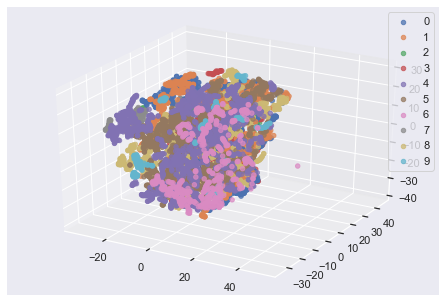

In [19]:
x_train_emb3 = TSNE(n_components=3, perplexity=50, n_iter=5000).fit_transform(x_train)
#z_train_emb3 = TSNE(n_components=3, perplexity=35).fit_transform(z_train_sm)
fig = plt.figure()
ax = Axes3D(fig)
for label in range(10):
    x_train_tmp = x_train_emb3[y_train==label]
    ax.scatter(x_train_tmp[:,0], x_train_tmp[:,1], x_train_tmp[:,2], alpha=0.75, label=label)
ax.legend()
plt.show()

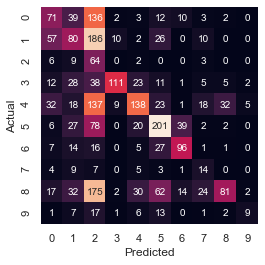

0.3511977263499797


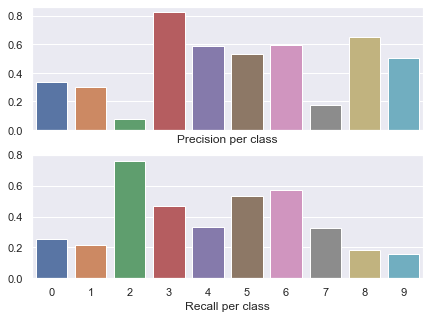

In [130]:
# Using forward selection to select top 10 attributes
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sets = create_train_test_sets(roadsigns)
values = sets["train_x"].values
values_test = sets["test_x"].values

# forward selection finding the top 10 features
forward_select = SFS(GaussianNB(), k_features=10, forward=True, floating=False,scoring = 'r2',cv = 0)
forward_select.fit(sets["train_x"], sets["train_y"])

all_top_FS = pd.DataFrame() 
for i in range(10):
    a = roadsigns.loc[roadsigns['class'] == i]
    b = np.array(sfs.k_feature_names_)
    data = a[b].values.tolist()
    all_top_FS = all_top_FS.append(data, ignore_index = True)
    
all_top_FS['class'] = classes
all_top_FS = sk.utils.shuffle(all_top_FS)

sets = create_train_test_sets(all_top_FS)
mat = naive_bayes(None, sets["train_x"], sets["train_y"], sets["test_x"], sets["test_y"])
precision_recall(mat)

# Visualising the top 100 features selected with the Forward Selection method
signs = roadsigns.drop(["class"], axis = 1)
signs0 = np.array(allInstancesToMatrix(signs))
a = signs0.mean(axis=0) - 30
flat = a.reshape(2304, 1)

for i in sfs.k_feature_names_ :
    i = int(i)
    flat[i] = 0

img = flat.reshape(48,48)
plt.imshow(img, cmap=cm.Greys)
plt.show(block=True)



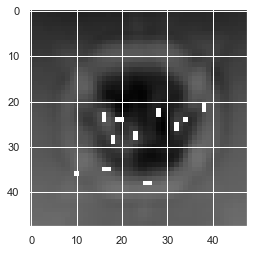

In [186]:
# Visualising the top 2 features (per class) from Correlation
signs = roadsigns.drop(["class"], axis = 1)
signs0 = np.array(allInstancesToMatrix(signs))
a = signs0.mean(axis=0)
flat = a.reshape(2304, 1)

for i in top2:
    i = int(i)
    flat[i] = 0

img = flat.reshape(48,48)
plt.imshow(img, cmap=cm.Greys)
plt.show(block=True)

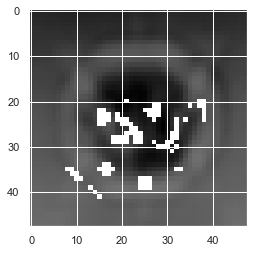

In [187]:
# Visualising the top 10 features (per class) from Correlation
signs = roadsigns.drop(["class"], axis = 1)
signs0 = np.array(allInstancesToMatrix(signs))
a = signs0.mean(axis=0) 
flat = a.reshape(2304, 1)

for i in top10:
    i = int(i)
    flat[i] = 0

img = flat.reshape(48,48)
plt.imshow(img, cmap=cm.Greys)
plt.show(block=True)

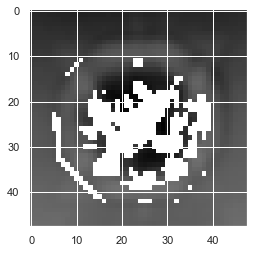

In [188]:
# Visualising the top 50 features (per class) from Correlation
signs = roadsigns.drop(["class"], axis = 1)
signs0 = np.array(allInstancesToMatrix(signs))
a = signs0.mean(axis=0)
flat = a.reshape(2304, 1)

for i in top50:
    i = int(i)
    flat[i] = 0

img = flat.reshape(48,48)
plt.imshow(img, cmap=cm.Greys)
plt.show(block=True)

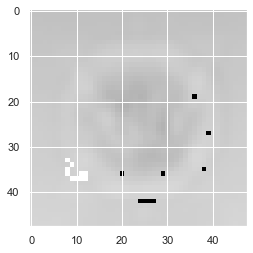

In [207]:
# Visualising the top 50 features (per class) from Correlation
signs = roadsigns.drop(["class"], axis = 1)
signs0 = np.array(allInstancesToMatrix(signs))
a = signs0.mean(axis=0)
flat = a.reshape(2304, 1)

k2 = [1785, 1736, 1592, 
1786,1688, 1740, 
1787, 1786, 1641, 
1788, 1740, 1739]

k3 = [  2040, 1335, 1748, 
        2041, 2040, 948, 
        2042, 2041, 1757, 
        2043, 2042, 1718 ] 



for i in k2:
    i = int(i)
    flat[i] = 0
    
for i in k3:
    i = int(i)
    flat[i] = 255

img = flat.reshape(48,48)
plt.imshow(img, cmap=cm.Greys)
plt.show(block=True)

In [ ]:
1785, 1736, 1592, 
1786,1688, 1740, 
1787, 1786, 1641, 
1788, 1740, 1739
2040, 1335, 1748, 
2041, 2040, 948, 
2042, 2041, 1757, 
2043, 2042, 1718 